In [1]:
import numpy as np
from matplotlib import widgets
import scipy.optimize as so
import pandas as pd
import pulp as pp
from prog_dual import probleme as pr, resolution, affichage

# Présentation du problème particulier :


|              | Lot 1 | Lot2 | Lot 3 | Demande |
|--------------|-------|------|-------|---------|
|Fusils        | 500   | 300  | 800   |100000   |
|Grenades      |1000   |2000  |1500   |200000   |
|Chars         |10     |20    |15     |100      |
|Mitrailleuses |100    |80    |15     |400      |
|Bazookas      | 80    | 120  |200    |400      | 
|Coûts des lots|10M    |12M   |15M    |         |

Nous avons à faire une forme duale de programme linéaire.

## Primal : 

- liste des contraintes :

\begin{cases}
500x + 300y + 800z \ge 100000 \\
1000x + 2000y + 1500z \ge 200000 \\
10x + 20y + 15z \ge 100 \\
100x + 80y + 15z \ge 400 \\
80x + 120y + 200z \ge 400 
\end{cases}

- Avec $x, y, z$, les nombres de lots choisis respectivement dans les lots $1, 2 \text{ et } 3$. 
Le programme à minimiser est : $$\min_{x y z} 10x + 12y + 15z$$ 

## Dual : 

- liste des contraintes :

\begin{cases}
500a + 1000b + 10c +100d + 80e \le 10000000 \\
300a + 2000b + 20c + 80d + 120e \le 12000000 \\
800a + 1500b + 15c + 15d + 200e \le 15000000 
\end{cases}

- Avec $a b c d e $, les prix des armes dans (fusils, grenades, chars, mitrailleuses, bazookas). \
Le profit du fabricant est :
$$\pi = 100000a+200000b+100c+400d+400e$$
Le programme à maximiser est : $$\max_{abcde} \Pi$$

## Ecriture matricielle :

- Avec A la matrice des coûts des lots, B la matrice des coefficients, C la matrice de la demande, X la matrice des nb de lots et Y la matrice des prix unitaires, G le coût total payé par le demandeur et G' le profit du fabricant.

$$A = \begin{bmatrix} 
10 & 12 & 15 \\  
\end{bmatrix}, 
B = \begin{bmatrix}
500 & 300 & 800 \\
1000 & 2000 & 1500 \\
10 & 20 & 15 \\
100 & 80 & 15 \\
80 & 120 & 200
\end{bmatrix},
C = \begin{bmatrix}
100000 \\
200000\\
100\\
400\\
400
\end{bmatrix},
X = \begin{bmatrix}
x \\
y \\
z \\
\end{bmatrix},
Y = \begin{bmatrix}
a \\
b \\
c \\
d \\
e
\end{bmatrix}
$$

- Primal et minimisation du nb de lot :
Minimiser $G = AX$ sous les contraintes : $BX \ge C$ et $X \ge 0$

- Dual et maximisation des prix unitaires : 
Maximiser $G' = C^TY$ sous les contraintes : $B^TY \le A^T$ et $Y\ge 0$

## Résolution avec linprog :

In [2]:
B = np.array([[500, 300, 800],
              [1000, 2000, 1500],
              [10, 20, 15],
              [100, 80, 15],
              [80, 120, 200]]) # matrice des coefficients

A = np.array([10000000, 12000000, 15000000]) # matrice des coûts des lots

C = np.array([100000, 200000, 100, 400, 400]) # matrice de la demande

Ct = C.T
Bt = B.T
At = A.T

In [3]:
solution_primal = so.linprog(c=A, A_ub=-B, b_ub=-C , method= "highs")
print(solution_primal)

           con: array([], dtype=float64)
 crossover_nit: 0
           fun: 1930434782.608696
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([    0.        ,     0.        ,  1900.        ,  2121.73913043,
       24991.30434783])
        status: 0
       success: True
             x: array([  0.        ,   8.69565217, 121.73913043])


In [4]:
solution_dual = so.linprog(c=-Ct, A_ub=Bt, b_ub=At , method= "highs")
print(solution_dual)

           con: array([], dtype=float64)
 crossover_nit: 0
           fun: -1930434782.6086955
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([347826.08695652,      0.        ,      0.        ])
        status: 0
       success: True
             x: array([10434.7826087,  4434.7826087,     0.       ,     0.       ,
           0.       ])


In [5]:
B = np.array([[500, 300, 800],
              [1000, 2000, 1500],
              [10, 20, 15],
              [100, 80, 15],
              [80, 120, 200],
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]]) # matrice des coefficients

A = np.array([10000000, 12000000, 15000000]) # matrice des coûts des lots

C = np.array([100000, 200000, 100, 400, 400, 0, 0, 0]) # matrice de la demande

Ct = C.T
Bt = B.T
At = A.T

In [6]:
def resoud_pb (A, B, C) :
    Ct = C.T
    Bt = B.T
    At = A.T
    solution_primal = so.linprog(c=A, A_ub=-B, b_ub=-C , method= "highs")
    solution_dual = so.linprog(c=-Ct, A_ub=Bt, b_ub=At , method= "highs")
    print(solution_primal)
    print(solution_dual)

In [7]:
resoud_pb (A, B, C)

           con: array([], dtype=float64)
 crossover_nit: 0
           fun: 1930434782.6086955
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([0.00000000e+00, 0.00000000e+00, 1.90000000e+03, 2.12173913e+03,
       2.49913043e+04, 0.00000000e+00, 8.69565217e+00, 1.21739130e+02])
        status: 0
       success: True
             x: array([ -0.        ,   8.69565217, 121.73913043])
           con: array([], dtype=float64)
 crossover_nit: 0
           fun: -1930434782.6086955
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([347826.08695652,      0.        ,      0.        ])
        status: 0
       success: True
             x: array([10434.7826087,  4434.7826087,     0.       ,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ])


## Résolution avec Pulp

In [8]:
x = pp.LpVariable("x", 0, None, pp.LpInteger)
y = pp.LpVariable("y", 0, None, pp.LpInteger)
z = pp.LpVariable("z", 0, None, pp.LpInteger)
prob = pp.LpProblem("Prog_primal", pp.LpMinimize )
prob.setObjective(10000000*x + 12000000*y + 15000000*z)
prob.addConstraint(500*x + 300*y + 800*z >= 100000)
prob.addConstraint(1000*x + 2000*y + 1500*z >= 200000)
prob.addConstraint(10*x + 20*y + 15*z >= 100)
prob.addConstraint(100*x + 80*y + 15*z >= 400)
prob.addConstraint(80*x + 120*y + 200*z >= 400)
prob.solve()
for var in prob.variables():
    print(var, var.value())
prob.objective.value()

x 1.0
y 9.0
z 121.0


1933000000.0

In [9]:
a = pp.LpVariable("a", 0, None, pp.LpContinuous)
b = pp.LpVariable("b", 0, None, pp.LpContinuous)
c = pp.LpVariable("c", 0, None, pp.LpContinuous)
d = pp.LpVariable("d", 0, None, pp.LpContinuous)
e = pp.LpVariable("e", 0, None, pp.LpContinuous)
probD = pp.LpProblem("Prog_dual", pp.LpMaximize)
probD.setObjective(100000*a + 200000*b + 100*c + 400*d + 400*e)
probD.addConstraint(500*a + 1000*b + 10*c + 100*d + 80*e <= 10000000)
probD.addConstraint(300*a + 2000*b + 20*c + 80*d + 120*e <= 12000000)
probD.addConstraint(800*a + 1500*b + 15*c + 15*d + 200*e <= 15000000)
probD.solve()
for var in probD.variables():
    print(var, var.value())
probD.objective.value()

a 10434.783
b 4434.7826
c 0.0
d 0.0
e 0.0


1930434820.0

Remarques : 

- considérer les lots comme fractionnables n'est pas logique du tout. Le principe des lots reposant justement sur le fait qu'ils ne soient pas fractionnables. En effet, le vendeur confectionne les lots en leur donnant une valeur globale afin de valoriser des types d'armes dans chaque lots tout en incitant l'acheteur à prendre certaines quantité de types d'armes dont il n'a pas besoin (ainsi le vendeur peut quand même écouler ses stocks) . Si l'acheteur peut fractionner ses lots, il n'y a plus d'intéret à faire des lots car l'acheteur peut prendre une quantité inférieure à la quantité minimum proposée par le vendeur (hors cette quantité minimum permet d'optimiser l'écoulement des stocks pour le vendeur). De plus, une arme ne peut être "découpée".

- La valeur de la fonction objectif du primal  correspond au chiffre d'affaire pour le vendeur et au prix total payé pour l'acheteur. La valeur de la fonction objectif du programme dual correspond au chiffre d'affaire de l'entrant sur le marché.

- Lorsqu'on considère que les lots sont fractionnables, la valeur de la fonction objectif du programme est la même pour le vendeur et l'entrant. En revanche, dans le cas de lots non fractionnables, on remarque que le chiffre d'affaire de l'entrant est inférieur à celui du vendeur "par lot". Le demandeur aura donc intéret à choisir l'entrant car il économise 2,6 millions d'euros environs. 

- On remarque que l'entrant proposera certains prix unitaires à 0. Cela signifie que si l'acheteur satisfait toute sa demande avec l'entrant, il paiera certains type d'armes et se verra offrir les autres.

- Si l'on baisse le prix du lot 1 en dessous d'un certain palier, l'acheteur ne choisira que des lots 1. En revanche, si l'on augmente le prix du lot 1 au dessus de 15 millions, l'acheteur ne selectionnera plus de lot1.


# Généralisation : 

## Ecriture et affichage d'un problème 

Le module problème permet de définir les données d'un problème de programme dual de vente d'armes afin de pouvoir généraliser le problème présenter par le sujet "Aux armes".

Tout d'abord, on définit des lots. Un lot est est composé de  d'un nombre de différentes types d'armes. Un coût est fixé pour chaque lot. Notre programme vérifie qu'un lot est valide. On trouvera ci dessous des exemples de lots valides et non valides. Si un lot n'est pas valide, la classe Lot le détecte et renvoie une erreur correspondant à la raison de non-validité.

In [10]:
###########Lot non valide################# 
Lot1 = pr.Lot("Lot1", 20, ["caillou", "lame"], [6, 20])
Lot2 = pr.Lot("Lot2", 18, ["caillou", "lame"], [20, 6])
Lot3 = pr.Lot("Lot3", 14, ["caillou", "lame"], [15, 7])
Lot4 = pr.Lot("Lot4", 20, ["baton", "lame"], [7, 6])
Lot5 = pr.Lot("Lot5", 20, ["caillou", "lame", "cuillere"], [20, 6, 5])
Lot9 = pr.Lot("Lot9", 20, ["caillou", "lame", "cuillere"], [20, 6, 5])
Lot10 = pr.Lot("Lot9", 25, ["caillou", "lame", "cuillere"], [18, 6, 5])


In [11]:
###########Lot non valide################# 
# Lot6 = pr.Lot("Lot6", 20, ["caillou", "lame", "lame"], [20, 6, 5])
# Lot7 = pr.Lot("Lot7", 20, ["caillou", "lame", "cutter"], [20, 6, 5, 7])
# Lot8 = pr.Lot("Lot8", -20, ["caillou", "lame", "cutter"], [20, 6, 5])

Un problème est composé de différents lots et d'une demande. Notre programme vérifie que le problème est valide. Ci dessous, on trouvera un exemple de problème valide puis une série de problème non valide détectés par notre programme.

In [12]:
Test1 = pr.Probleme([Lot1, Lot2, Lot3], demande = [40, 12])

In [13]:
# Test2 = pr.Probleme([Lot3, Lot4],[300, 200])

In [14]:
# Test3 = pr.Probleme([Lot3, Lot5], [200, 200])

In [15]:
# Test4 = pr.Probleme([Lot5, Lot9], [100, 60, 200])

In [16]:
# Test5 = pr.Probleme([Lot9, Lot10], [100, 10, 87])

In [17]:
# Test6 = pr.Probleme([Lot1, Lot2, Lot3], [100,100, 100])  

In [18]:
# Test7 = pr.Probleme([Lot1, Lot2], [100, 200])

In [19]:
# Test8 = pr.Probleme([Lot1],[100,100])

In [20]:
# Test9 = pr.Probleme([Lot1, Lot2], [100, 200, 60] )

In [21]:
# Test11 = pr.Probleme([Lot1, Lot2])

La fonction __repr__ permet d'afficher en 'brut' les données d'un problème.

In [22]:
Test1

probleme(lots=[Lot(nom='Lot1', cout=20, type_arme=['caillou', 'lame'], quantite=[6, 20]), Lot(nom='Lot2', cout=18, type_arme=['caillou', 'lame'], quantite=[20, 6]), Lot(nom='Lot3', cout=14, type_arme=['caillou', 'lame'], quantite=[15, 7])],demande = [40, 12])

La fonction __str__ permet d'afficher les données d'un problème d'une manière plus structurée.

In [23]:
print(Test1)

Lot(nom='Lot1', cout=20, type_arme=['caillou', 'lame'], quantite=[6, 20])
Lot(nom='Lot2', cout=18, type_arme=['caillou', 'lame'], quantite=[20, 6])
Lot(nom='Lot3', cout=14, type_arme=['caillou', 'lame'], quantite=[15, 7])
Demande = [40, 12]


La fonction __eq__ permet de voir si deux problèmes sont identiques.

In [24]:
Test13 = pr.Probleme.par_str("""
Lot1 / 5 / caillou ciseau / 10 1
Lot2 / 7 / caillou ciseau / 7 2
60 10
""")

In [25]:
Test14 = pr.Probleme.par_str("""
Lot1 / 5 / caillou ciseau / 10 1
Lot2 / 7 / caillou ciseau / 7 2
60 10
""")

In [26]:
Test13 == Test14

True

Afin d'afficher les données du problèmes, on construit les différents éléments du tableau (coût, lots et matrice des coefficients).

In [27]:
Test1._def_matrice()

(matrix([['6', '20', '15', '40'],
         ['20', '6', '7', '12'],
         ['20', '18', '14', '']], dtype='<U11'),
 [[6, 20], [20, 6], [15, 7]],
 [20, 18, 14],
 [[40, 12]])

In [28]:
print(Test1)

Lot(nom='Lot1', cout=20, type_arme=['caillou', 'lame'], quantite=[6, 20])
Lot(nom='Lot2', cout=18, type_arme=['caillou', 'lame'], quantite=[20, 6])
Lot(nom='Lot3', cout=14, type_arme=['caillou', 'lame'], quantite=[15, 7])
Demande = [40, 12]


Afin de faciliter l'utilisation du programme pour l'utilisateur, on utilise la fonction `par_str` pour encoder le problème. Cette fonction utilise la fonction `_encode` pour encode chaque ligne rentrée.

In [29]:
Test10 = pr.Probleme.par_str("""
lotA / 13 / fusil canon pierre / 50 10 2
lotB / 18 / fusil canon pierre / 62 8 4
100 200 1000
""")


In [30]:
print(Test10)

Lot(nom='lotA', cout=13, type_arme=['fusil', 'canon', 'pierre'], quantite=[50, 10, 2])
Lot(nom='lotB', cout=18, type_arme=['fusil', 'canon', 'pierre'], quantite=[62, 8, 4])
Demande = [100, 200, 1000]


L'instance de Problème Test 12 représente les données du sujets "Aux armes".

In [31]:
Test12 = pr.Probleme.par_str("""
Lot1 / 10000000 / Fusils Grenades Chars Mitrailleuses Bazookas / 500 1000 10 100 80
Lot2 / 12000000 / Fusils Grenades Chars Mitrailleuses Bazookas / 300 2000 20 80 120
Lot3 / 15000000 / Fusils Grenades Chars Mitrailleuses Bazookas / 800 1500 15 15 200
100000 200000 100 400 400
""")

In [32]:
print(Test12)

Lot(nom='Lot1', cout=10000000, type_arme=['Fusils', 'Grenades', 'Chars', 'Mitrailleuses', 'Bazookas'], quantite=[500, 1000, 10, 100, 80])
Lot(nom='Lot2', cout=12000000, type_arme=['Fusils', 'Grenades', 'Chars', 'Mitrailleuses', 'Bazookas'], quantite=[300, 2000, 20, 80, 120])
Lot(nom='Lot3', cout=15000000, type_arme=['Fusils', 'Grenades', 'Chars', 'Mitrailleuses', 'Bazookas'], quantite=[800, 1500, 15, 15, 200])
Demande = [100000, 200000, 100, 400, 400]


## Résolution du problème et affichage :

Le modue résolution permet de résoudre le programme dual, c'est à dire trouver le choix optimal de lots pour le demandeur et les prix unitaires des armes optimaux pour l'entrant. Le module résolution propose deux méthodes de résolutions, l'une qui considère les lots comme fractionnables, l'autre qui considère les lots comme non fractionnables.

Le module affichage permet d'afficher de représenter les données du problèmes et d'afficher les solutions selon deux critères : 
   - solution primal (demandeur) ou solution dual (entrant)
   - lots fractionables ou non fractionables.

La fonction `genere_table`représente les données du problème dans un dataframe.

In [33]:
affichage.genere_table(Test1)

,Lot1,Lot2,Lot3,demande
caillou,6,20,15,40
lame,20,6,7,12
cout_lot,20,18,14,


In [34]:
affichage.genere_table(Test12)

,Lot1,Lot2,Lot3,demande
Fusils,500,300,800,100000
Grenades,1000,2000,1500,200000
Chars,10,20,15,100
Mitrailleuses,100,80,15,400
Bazookas,80,120,200,400
cout_lot,10000000,12000000,15000000,


La fonction `table_solutions`permet de d'afficher les solutions selon les critères primal et frac.

In [35]:
affichage.tables_solutions(Test12, primal=True, frac=False)

,Nb de lots
Lot1,1.0
Lot2,9.0
Lot3,121.0


In [36]:
affichage.tables_solutions(Test12, primal=False, frac=True)

,Prix unitaire
Fusils,10434.78
Grenades,4434.78
Chars,0.00
Mitrailleuses,0.00
Bazookas,0.00


La fonction `affichage_solution`permet d'afficher un récapitulatif des solutions primal et dual.

In [37]:
affichage.affichage_solutions(Test12, frac=True)

Composition de lots optimale pour l'acheteur : 
        Nb de lots
Lot1        0.00
Lot2        8.70
Lot3      121.74 
 Prix unitaires optimaux pour l'entrant : 
                Prix unitaire
Fusils              10434.78
Grenades             4434.78
Chars                   0.00
Mitrailleuses           0.00
Bazookas                0.00


La fonction `resume_pulp`permet de synthétiser les données du programme et les solution lorsque l'on considère que les lots sont non fractionnables.

In [38]:
affichage.resume_pulp(Test12, primal = False)

(Prog_dual:
 MAXIMIZE
 400*Bazookas + 100*Chars + 100000*Fusils + 200000*Grenades + 400*Mitrailleuses + 0
 SUBJECT TO
 _C1: 80 Bazookas + 10 Chars + 500 Fusils + 1000 Grenades + 100 Mitrailleuses
  <= 10000000
 
 _C2: 120 Bazookas + 20 Chars + 300 Fusils + 2000 Grenades + 80 Mitrailleuses
  <= 12000000
 
 _C3: 200 Bazookas + 15 Chars + 800 Fusils + 1500 Grenades + 15 Mitrailleuses
  <= 15000000
 
 VARIABLES
 Bazookas Continuous
 Chars Continuous
 Fusils Continuous
 Grenades Continuous
 Mitrailleuses Continuous,
 [0.0, 0.0, 10434.783, 4434.7826, 0.0],
 1930434820.0)

# Applications pout l'utilisateur : 

Deux applications ont été développées. Une application basique (app_basique.py) où l'on peut rentrer les données du problème soit à partir d'un fichier texte, soit directement dans un terminal. Cette application permet de choisir si les lots sont fractionnables ou non. La seconde application (app_gui.py) est plus intuitive et permet à l'utilisateur non initié à python et au codage de rentrer et résoudre un problème plus facilement, avec une interface plus attractive. 
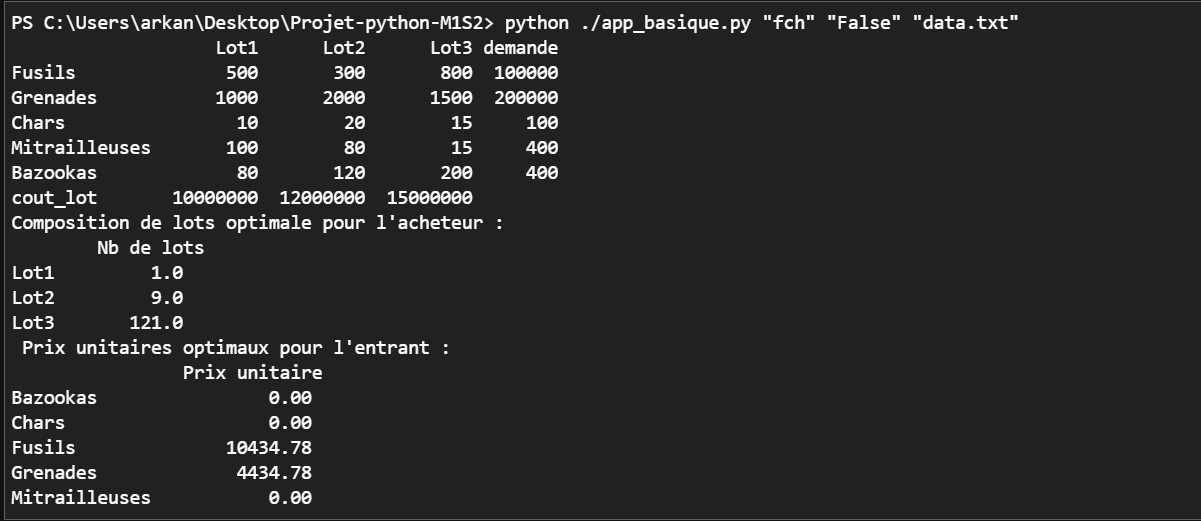


## Application GUI : Interface graphique avec les widgets : 
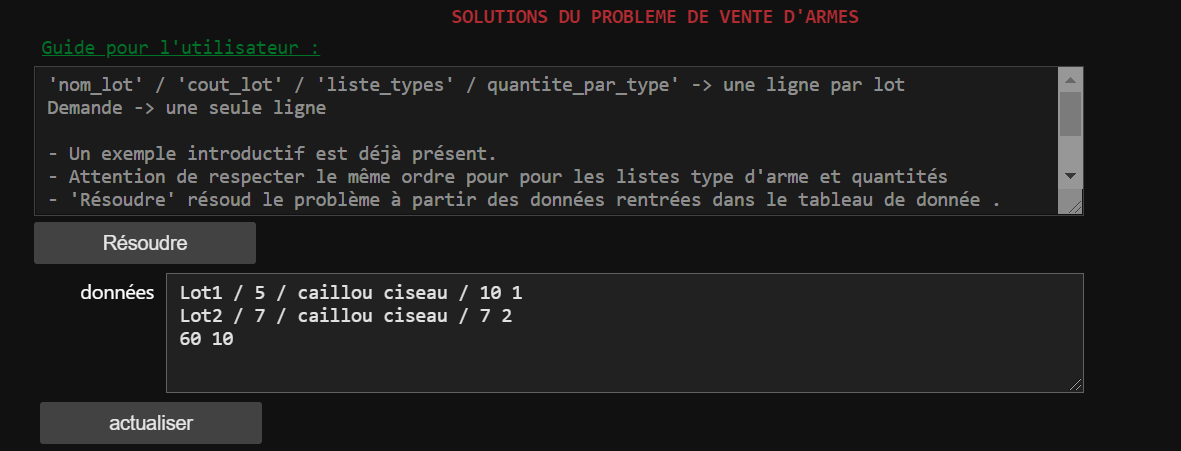

Ci dessous les commandes sous python afin de lancer l'application :

In [39]:
from app_gui import Application
mon_application = Application()
mon_application.affichage()

# Tests :

On trouvera un dossier Test regroupant les tests qui vérifient que les fonctions du dossier prog_dual sont correctes et renvoient des résultats correctes (à l'aide du module `pytest`. On trouvera également ci-deesous un rapport du pourcentage de fonctions testées à l'aide du package `coverage`. Nous avons cependant quelques interrogations par rapport à l'utilisation de ce package.

## Rappel pour les tests : 
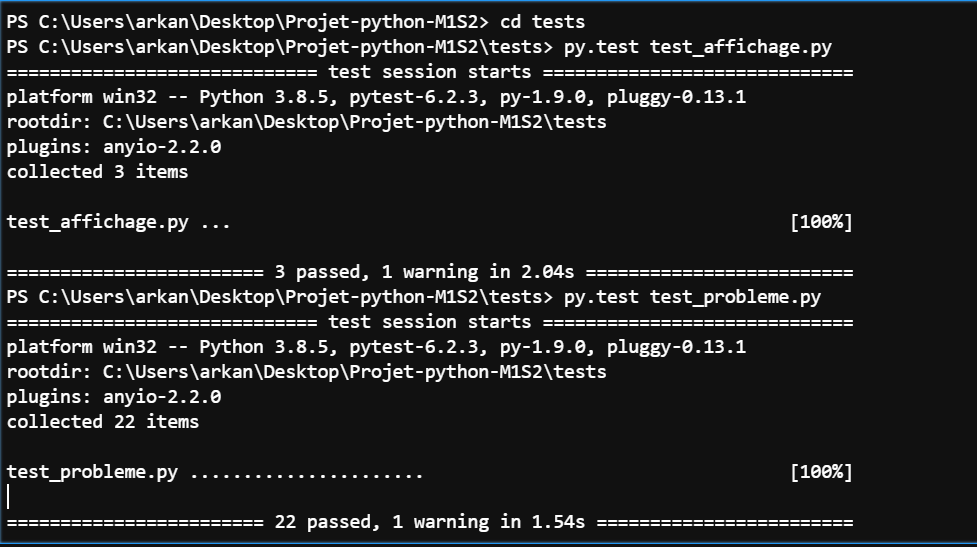

# Couverture des test : 

A l'aide du package *coverage*, on peut observer le pourcentage de fonctions couvertes par les test. 

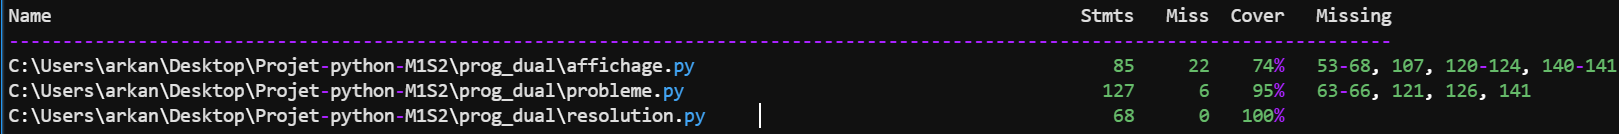